In [1]:
import os
import numpy as np
import pandas as pd
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import img_to_array
from keras.models import load_model
from keras.optimizers import Adam
from PIL import Image
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [2]:
train_data_path = r".\origin_data"
val_data_path = r".\val_dataset"
model_path = ".\models"

In [3]:
# data_path = path + "origin_data"
# 0:20 1:30 2:50 3:60 4:70
label_name = ["Giới hạn tốc độ 40km/h", "Giới hạn tốc độ 50km/h", "Giới hạn tốc độ 60km/h",
          "Hết hạn giới hạn tốc độ tối đa 40km/h", "Hết hạn giới hạn tốc độ tối đa 50km/h",
          "Hết hạn giới hạn tốc độ tối đa", "Vào khu vực khu dân cư", "Ra khỏi khu vực khu dân cư", "Cấm", "Stop",
          "Chợ"
]

In [4]:
classes = len(label_name)
def load_and_resize_image(classes = classes, dataset_path = None, img_size = (150,150)):
    data = []
    labels = []
    for i in range(classes):

        # print('i', i)
        path = os.path.join(dataset_path,str(i))
        # print('path', path)
        images = os.listdir(path)
        for a in images:
            try:
                img = load_img( 
                            os.path.join(dataset_path,str(i),a),
                            # grayscale=False,
                            color_mode="rgb",
                            target_size=(150,150),
                )
                img = np.array(img)
                data.append(img)
                labels.append(i)
                
            except:
                print('khong the load file')
    print(pd.value_counts(labels))
    return np.array(data), np.array(labels)
# X = np.array(data)
# y = np.array(labels)
data_train,labels_train = load_and_resize_image(classes, train_data_path, (150,150))
X_val, y_val = load_and_resize_image(classes, val_data_path, (150,150))


1     2081
2     1436
8     1026
9      741
0      479
5      280
3      271
10     229
7      218
4      202
6      160
dtype: int64
1     337
2     232
8     142
9      94
0      70
3      44
5      40
7      36
4      34
10     32
6      29
dtype: int64


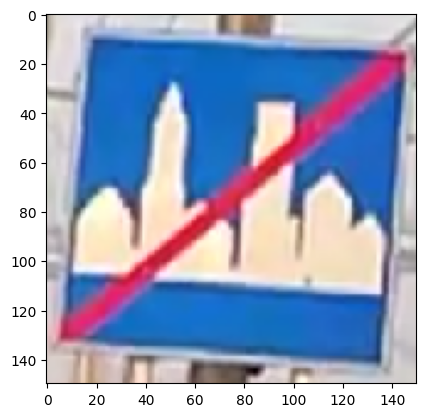

In [5]:
plt.figure()
plt.imshow(data_train[5000])
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_train, labels_train, test_size = 0.2, random_state = 50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5698, 150, 150, 3) (1425, 150, 150, 3) (5698,) (1425,)


In [7]:
# # resize value (0-255) to (0-1) on X_train, X_test
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#one-hot encoding the labels
y_train_one_hot = to_categorical(y_train, classes)
y_test_one_hot = to_categorical(y_test, classes)
y_val_one_hot = to_categorical(y_val, classes)
print(y_train_one_hot.shape, y_test_one_hot.shape, y_val_one_hot.shape)

(5698, 150, 150, 3) (1425, 150, 150, 3) (5698,) (1425,)
(5698, 11) (1425, 11) (1090, 11)


In [10]:
def built_model(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    # model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    # model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    # model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    # model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dense(11, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model
 

In [11]:
model = built_model(X_train.shape[1:], classes )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [12]:
history = model.fit(x = X_train, y = y_train_one_hot, batch_size=64, epochs=10, validation_data=(X_test, y_test_one_hot))

Epoch 1/10
90/90 [==============================] - 448s 5s/step - loss: 1.4286 - accuracy: 0.4545 - val_loss: 0.8760 - val_accuracy: 0.6975
Epoch 2/10
90/90 [==============================] - 438s 5s/step - loss: 0.3685 - accuracy: 0.8610 - val_loss: 0.3095 - val_accuracy: 0.8940
Epoch 3/10
90/90 [==============================] - 438s 5s/step - loss: 0.1234 - accuracy: 0.9610 - val_loss: 0.0689 - val_accuracy: 0.9775
Epoch 4/10
90/90 [==============================] - 435s 5s/step - loss: 0.0379 - accuracy: 0.9867 - val_loss: 0.1086 - val_accuracy: 0.9789
Epoch 5/10
90/90 [==============================] - 432s 5s/step - loss: 0.0851 - accuracy: 0.9763 - val_loss: 0.0260 - val_accuracy: 0.9930
Epoch 6/10
90/90 [==============================] - 431s 5s/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0804 - val_accuracy: 0.9726
Epoch 7/10
90/90 [==============================] - 430s 5s/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0643 - val_accuracy: 0.9818
Epoch 8/10
90

In [13]:
score = model.evaluate(x = X_val, y = y_val_one_hot, batch_size = 64)

18/18 [==============================] - 13s 675ms/step - loss: 13.9425 - accuracy: 0.9688


In [15]:
pred = model.predict(X_val, batch_size = 32)
pred = np.argmax(pred, axis = 1)

35/35 [==============================] - 17s 479ms/step


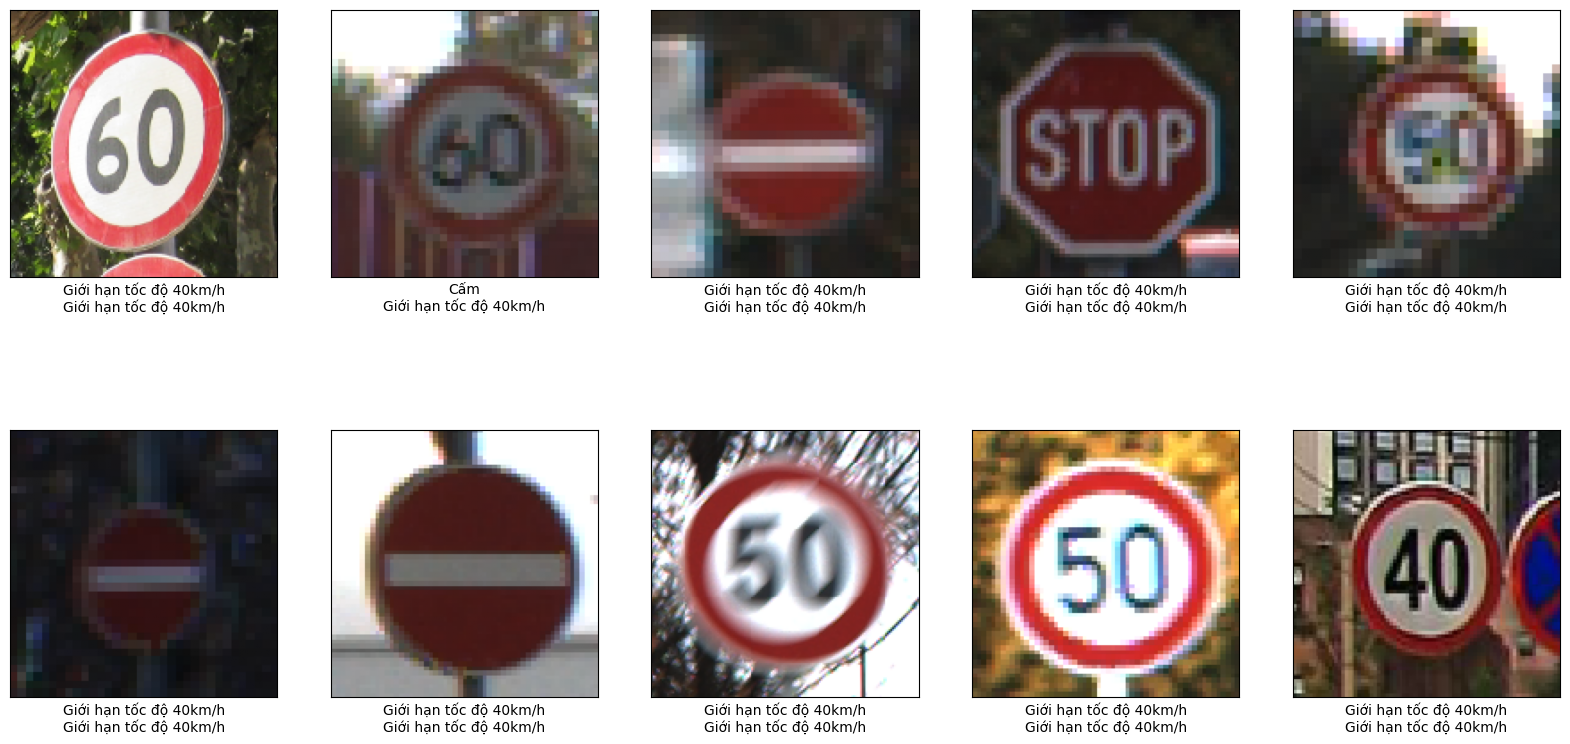

In [16]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(label_name[pred[i]]+"\n"+label_name[y_val[i]])
plt.show()

In [ ]:
# pred = model.predict(X_test, batch_size = 32)
# pred = np.argmax(pred, axis = 1)


52/52 [==============================] - 30s 581ms/step


In [17]:
matrix = confusion_matrix(y_val, pred)
print(matrix)

[[ 68   0   0   0   0   0   0   0   1   1   0]
 [  1 333   1   0   0   0   0   0   2   0   0]
 [  1   5 224   0   0   0   0   0   0   2   0]
 [  0   0   0  41   0   0   0   0   0   2   1]
 [  0   0   0   0  32   0   0   0   0   2   0]
 [  0   0   4   7   0  29   0   0   0   0   0]
 [  0   0   0   0   0   0  28   0   0   1   0]
 [  0   0   0   0   0   0   0  36   0   0   0]
 [  0   0   0   0   0   0   0   0 140   2   0]
 [  0   0   0   0   0   0   0   0   0  94   0]
 [  0   0   0   0   0   0   0   0   0   1  31]]


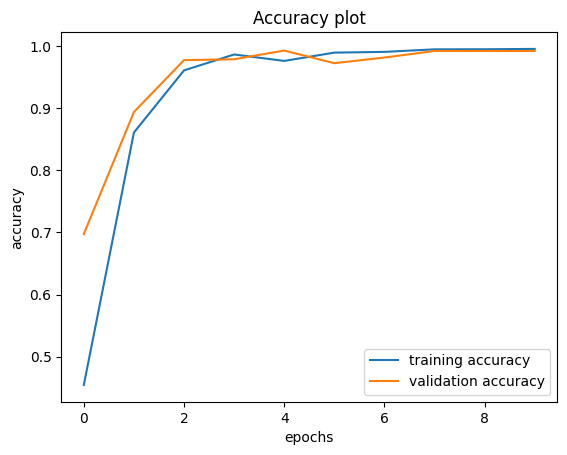

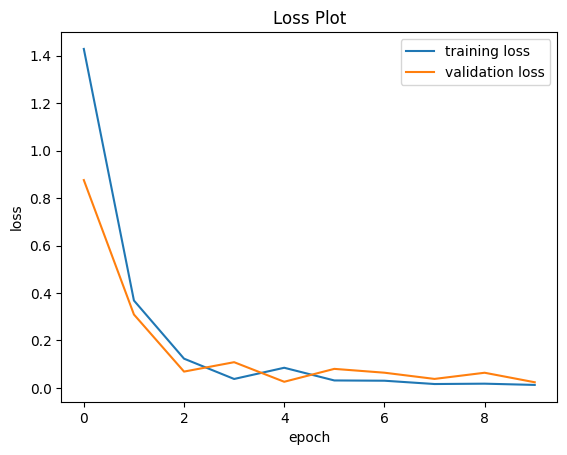

In [18]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.title("Loss Plot")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [19]:
model.save(model_path + '/mega_v1.h5')

In [20]:
model_load = load_model(model_path+ "/mega_v1.h5")

predict_val = model_load.predict(X_val)
argmax_predict_val = np.argmax(predict_val, axis = 1)
matrix = confusion_matrix(y_val, argmax_predict_val)
print(matrix)

35/35 [==============================] - 17s 481ms/step
[[ 68   0   0   0   0   0   0   0   1   1   0]
 [  1 333   1   0   0   0   0   0   2   0   0]
 [  1   5 224   0   0   0   0   0   0   2   0]
 [  0   0   0  41   0   0   0   0   0   2   1]
 [  0   0   0   0  32   0   0   0   0   2   0]
 [  0   0   4   7   0  29   0   0   0   0   0]
 [  0   0   0   0   0   0  28   0   0   1   0]
 [  0   0   0   0   0   0   0  36   0   0   0]
 [  0   0   0   0   0   0   0   0 140   2   0]
 [  0   0   0   0   0   0   0   0   0  94   0]
 [  0   0   0   0   0   0   0   0   0   1  31]]


In [37]:
a = model_load.predict(np.array(X_val[0:50]))
# print(.shape)
print(a[0][1])

2/2 [==============================] - 1s 234ms/step
0.0
